In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_excel('../data/default of credit card clients.xls')

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df.shape

(30000, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [11]:
df=df.rename(columns={'default payment next month':'default'})
df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

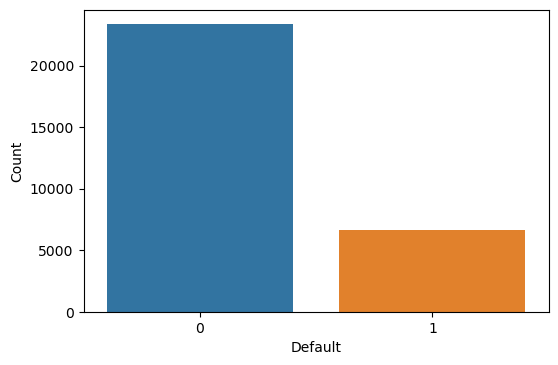

In [12]:
plt.figure(dpi=100)
sns.countplot(x="default", data=df)
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()

as expected data is imbalance

In [13]:
df2=df.copy()

In [14]:
#for seeing the ratio of genders
def sex1(x):
    if (x==1):
        return "Male"
    else:
        return "Female"
df2['SEX']=df['SEX'].apply(sex1)

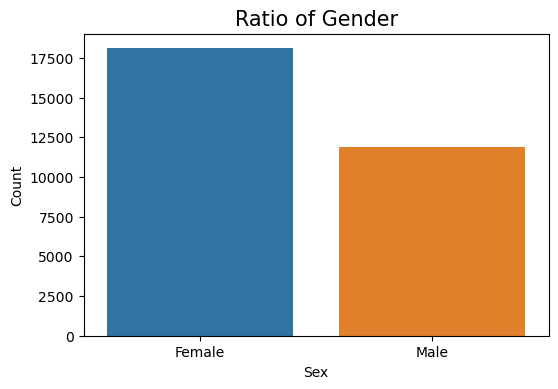

In [15]:
plt.figure(dpi=100)
df2.SEX.value_counts()
sns.countplot(x="SEX", data=df2)
plt.title("Ratio of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

so female is larger in numbers

In [16]:
df2.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

so there is 7 type of education present but 0,5,6,4 are smaller in number so we will merge it in 4 and make it others

In [17]:
def edu(x):
    if (x==0) or (x==5) or (x==6):
        x=4
    return x
df['EDUCATION']=df['EDUCATION'].apply(edu)
df2['EDUCATION']=df2['EDUCATION'].apply(edu)

In [18]:
def edu1(x):
    if (x==1):
        return "Graduate school"
    elif (x==2):
        return "University"
    elif (x==3):
        return "High School"
    else:
        return "Others"
df2['EDUCATION']=df2['EDUCATION'].apply(edu1)

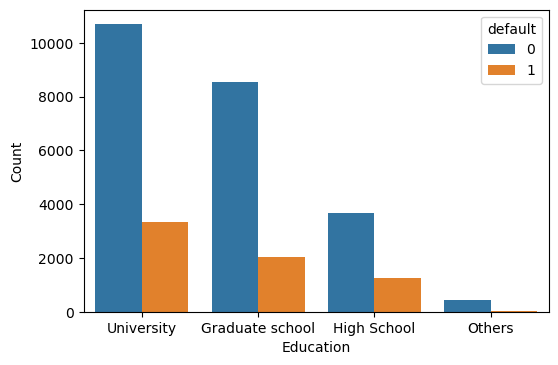

In [19]:
plt.figure(dpi=100)
df2.EDUCATION.value_counts()
sns.countplot(x="EDUCATION", hue="default", data=df2)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

so from this we can see most default are graduate school becoz of ratio

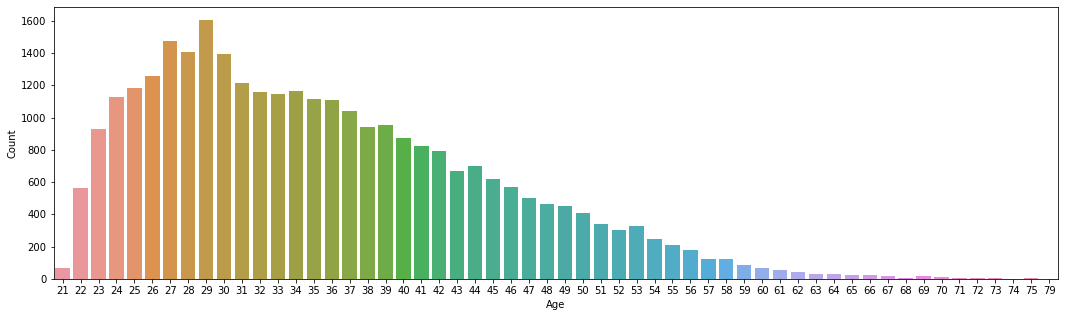

In [20]:
plt.figure(figsize=(18,5))
age=df2['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age,orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [21]:
#for this outlier is important 

## Feature Engineering

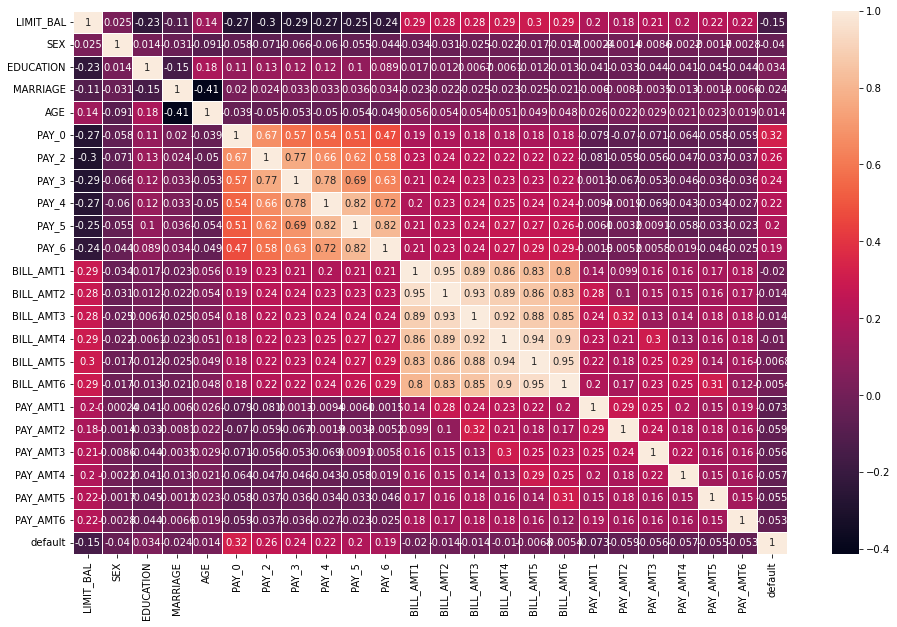

In [22]:
plt.figure (figsize= (16,10))
sns.heatmap(df.corr(),linewidths=.5,annot=True)
plt.show()

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation.

In [23]:
# One-hot encoding
df1=df.copy()
df1 = pd.get_dummies(df1, columns=["SEX"])
df1 = pd.get_dummies(df1, columns=["EDUCATION"])
df1 = pd.get_dummies(df1, columns=["MARRIAGE"])

In [24]:
df1

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,1,0,1,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,1,0,1,0,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,1,0,1,0,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,1,0,1,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,1,0,0,0,1,0,0,1,0,0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,1,0,0,0,1,0,0,0,1,0
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,1,0,0,1,0,0,0,0,1,0
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,1,0,0,0,1,0,0,1,0,0


In [27]:
df1.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'SEX_1', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [28]:
x=df1.drop(labels=['default'],axis=1)
y=df1['default']

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder

import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [30]:
#Splitting the data for sklearn methods
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [31]:
accuracy={}
model = LogisticRegression()
model.fit(x_train, y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(classification_report(train_pred, y_train))
print('\nAccuracy Score for model1(training): ', accuracy_score(train_pred, y_train))

print(classification_report(test_pred, y_test))
print('\nAccuracy Score for model1(testing): ', accuracy_score(test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     20100
           1       0.00      0.00      0.00         0

    accuracy                           0.78     20100
   macro avg       0.50      0.39      0.44     20100
weighted avg       1.00      0.78      0.87     20100


Accuracy Score for model1(training):  0.7772139303482587
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      9900
           1       0.00      0.00      0.00         0

    accuracy                           0.78      9900
   macro avg       0.50      0.39      0.44      9900
weighted avg       1.00      0.78      0.88      9900


Accuracy Score for model1(testing):  0.7820202020202021


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with 

### scaling

In [32]:
from sklearn.preprocessing import StandardScaler
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [33]:
scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data=test_scaler.fit_transform(x_test)

In [34]:
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)

In [35]:
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=x_test.columns, index=x_test.index)

### Over Sampling

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
from collections import Counter
Counter(y_train)

Counter({1: 4478, 0: 15622})

In [38]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(scaled_train_df,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 15622, 1: 4478})
The number of classes after fit Counter({0: 15622, 1: 11716})


In [39]:
accuracy={}
model = LogisticRegression()
model.fit(X_train_ns,y_train_ns)

train_pred = model.predict(X_train_ns)
test_pred = model.predict(scaled_test_df)

#print(classification_report(train_pred, y_train))
#print('\nAccuracy Score for model1(training): ', accuracy_score(train_pred, y_train))

print(classification_report(test_pred, y_test))
print('\nAccuracy Score for model1(testing): ', accuracy_score(test_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7795
           1       0.50      0.51      0.50      2105

    accuracy                           0.79      9900
   macro avg       0.68      0.69      0.68      9900
weighted avg       0.79      0.79      0.79      9900


Accuracy Score for model1(testing):  0.7861616161616162


In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [41]:
y_pred=classifier.predict(scaled_test_df)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7213  529]
 [1287  871]]
0.8165656565656566
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7742
           1       0.62      0.40      0.49      2158

    accuracy                           0.82      9900
   macro avg       0.74      0.67      0.69      9900
weighted avg       0.80      0.82      0.80      9900



In [42]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB(var_smoothing=0.5)

In [43]:
gnb.fit(X_train_ns,y_train_ns)

GaussianNB(var_smoothing=0.5)

In [44]:
y_pred=gnb.predict(scaled_test_df)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4439 3303]
 [ 626 1532]]
0.6031313131313132
              precision    recall  f1-score   support

           0       0.88      0.57      0.69      7742
           1       0.32      0.71      0.44      2158

    accuracy                           0.60      9900
   macro avg       0.60      0.64      0.57      9900
weighted avg       0.75      0.60      0.64      9900



In [46]:
import xgboost as xgb

In [47]:
param_grid_xgboost = {

                "n_estimators": [50,100, 130],
                               "max_depth": range(3, 11, 1),
    "random_state":[0,50,100]
    

            }

# Creating an object of the Grid Search class
grid= GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5,n_jobs=-1)

In [56]:
#grid.fit(X_train_ns,y_train_ns)

In [48]:
xg_new=xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=130,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [49]:
xgs=xg_new.fit(X_train_ns,y_train_ns)

In [50]:
y_pred=xgs.predict(scaled_test_df)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6988  754]
 [1233  925]]
0.7992929292929293
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      7742
           1       0.55      0.43      0.48      2158

    accuracy                           0.80      9900
   macro avg       0.70      0.67      0.68      9900
weighted avg       0.78      0.80      0.79      9900



In [51]:
param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model = model.fit(X_train_ns,y_train_ns)

In [52]:
model.best_estimator_

KNeighborsClassifier(n_neighbors=12, weights='distance')

In [53]:
knn=KNeighborsClassifier(n_neighbors=12, weights='distance')

In [54]:
knn1=knn.fit(X_train_ns,y_train_ns)

In [55]:
y_pred=knn1.predict(scaled_test_df)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6024 1718]
 [ 990 1168]]
0.7264646464646465
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      7742
           1       0.40      0.54      0.46      2158

    accuracy                           0.73      9900
   macro avg       0.63      0.66      0.64      9900
weighted avg       0.76      0.73      0.74      9900



In [57]:
import pickle
pickle.dump(classifier, open('model.pkl', 'wb'))#RANDOM FROREST
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(scaled_test_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
df1.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,1,0,1,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,1,0,1,0,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,1,0,1,0,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,1,0,1,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,1,0,0,1,0,0,0,1,0,0
